In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from scipy import stats
sys.path.append('../scripts')

from preprocess import load_countries

**Load clean data of benin, togo, sierraleone**

In [9]:
paths = ['../data/benin_clean.csv', '../data/togo_clean.csv', '../data/sieraleone_clean.csv']
full_df = load_countries(paths)
full_df.head()

,Unnamed: 0,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
0,0,2021-08-09 00:01:00,NaN,NaN,NaN,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,benin
1,1,2021-08-09 00:02:00,NaN,NaN,NaN,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,benin
2,2,2021-08-09 00:03:00,NaN,NaN,NaN,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,benin
3,3,2021-08-09 00:04:00,NaN,NaN,NaN,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,benin
4,4,2021-08-09 00:05:00,NaN,NaN,NaN,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,benin


**Boxplots of GHI, DNI, DHI side-by-side (one plot per metric, colored by country).**

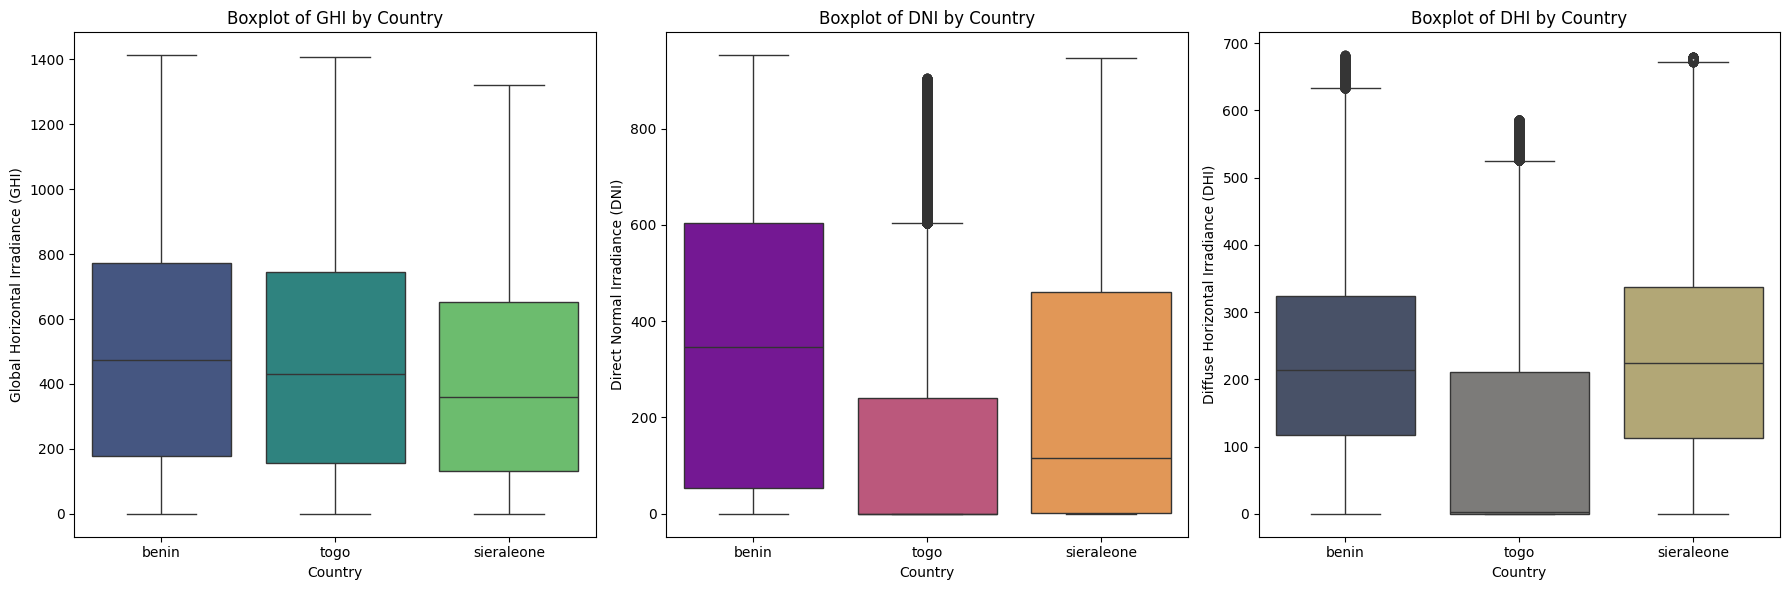

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
# Boxplot for GHI
sns.boxplot(ax=axes[0], x='Country', y='GHI', data=full_df, hue='Country', palette='viridis', legend=False)
axes[0].set_title('Boxplot of GHI by Country')
axes[0].set_ylabel('Global Horizontal Irradiance (GHI)')
axes[0].set_xlabel('Country')

# Boxplot for DNI
sns.boxplot(ax=axes[1], x='Country', y='DNI', data=full_df, hue='Country', palette='plasma', legend=False)
axes[1].set_title('Boxplot of DNI by Country')
axes[1].set_ylabel('Direct Normal Irradiance (DNI)')
axes[1].set_xlabel('Country')

# Boxplot for DHI
sns.boxplot(ax=axes[2], x='Country', y='DHI', data=full_df, hue='Country', palette='cividis', legend=False)
axes[2].set_title('Boxplot of DHI by Country')
axes[2].set_ylabel('Diffuse Horizontal Irradiance (DHI)')
axes[2].set_xlabel('Country')

plt.tight_layout()
plt.show()

**comparing mean, median, and standard deviation of GHI, DNI, DHI across countries**

In [14]:
agg_data=full_df.groupby('Country').agg({
    'GHI':['median', 'mean', 'std'],
    'DHI':['median', 'mean', 'std'],
    'DNI':['median', 'mean', 'std']
})
agg_data

GHI                            DHI                          \
           median        mean         std median        mean         std   
Country                                                                    
benin       474.2  476.746489  320.578541  213.4  230.560271  150.114373   
sieraleone  359.4  405.921735  304.608925  224.7  232.122256  148.044007   
togo        430.3  454.062824  319.068940    2.5  112.408673  151.292938   

              DNI                          
           median        mean         std  
Country                                    
benin       345.7  352.575567  280.657284  
sieraleone  115.3  236.240484  261.871060  
togo          0.0  149.368966  248.554496

**Statistical Testing**

the pv-value and Kruskal-Wallis H Test

In [12]:
countries = ['benin', 'togo', 'sieraleone']
group = [full_df['GHI'][full_df['Country']==country] for country in countries]
h_ghi, p_ghi = stats.kruskal(*group, nan_policy='omit')
print(h_ghi)
print(p_ghi)

6793.844966812636
0.0


In [13]:
full_df.describe()

,Unnamed: 0,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,1.576800e+06,1576800,799346.000000,1.034461e+06,1.054102e+06,1.575196e+06,1.574759e+06,1.576608e+06,1.576800e+06,1.572833e+06,1.573135e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06
mean,2.627995e+05,2022-04-01 12:00:29.999997184,445.710359,2.201733e+02,1.720355e+02,2.220244e+02,2.141266e+02,2.741864e+01,6.298333e+01,1.842446e+00,2.526632e+00,4.649840e-01,1.494072e+02,8.771398e+00,9.899963e+02,8.079655e-04,2.697615e-03,3.339823e+01,3.286939e+01
min,0.000000e+00,2021-08-09 00:01:00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,2.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.680000e+02,0.000000e+00,0.000000e+00,9.000000e+00,8.100000e+00
25%,1.313998e+05,2021-12-31 06:00:45,153.600000,0.000000e+00,1.100000e+00,0.000000e+00,0.000000e+00,2.370000e+01,3.860000e+01,6.000000e-01,1.100000e+00,4.000000e-01,5.330000e+01,2.900000e+00,9.770000e+02,0.000000e+00,0.000000e+00,2.370000e+01,2.370000e+01
50%,2.627995e+05,2022-04-01 12:00:30,416.400000,4.190000e+01,1.510000e+02,4.000000e+00,3.800000e+00,2.680000e+01,6.900000e+01,1.700000e+00,2.400000e+00,5.000000e-01,1.803000e+02,9.000000e+00,9.940000e+02,0.000000e+00,0.000000e+00,2.830000e+01,2.800000e+01
75%,3.941992e+05,2022-07-01 18:00:15,727.900000,4.470000e+02,2.870000e+02,4.091000e+02,3.948000e+02,3.100000e+01,8.860000e+01,2.800000e+00,3.600000e+00,6.000000e-01,2.342000e+02,1.290000e+01,9.990000e+02,0.000000e+00,0.000000e+00,4.260000e+01,4.190000e+01
max,5.255990e+05,2022-10-30 00:00:00,1413.000000,9.523000e+02,6.821000e+02,1.215000e+03,1.177000e+03,4.380000e+01,1.000000e+02,6.900000e+00,8.800000e+00,4.700000e+00,3.600000e+02,9.940000e+01,1.006000e+03,1.000000e+00,2.500000e+00,8.100000e+01,9.460000e+01
std,1.517277e+05,NaN,316.247811,2.728076e+02,1.615366e+02,3.139868e+02,3.030687e+02,5.128812e+00,2.854366e+01,1.463753e+00,1.856331e+00,2.904002e-01,1.039399e+02,6.790689e+00,1.046797e+01,2.841326e-02,3.803610e-02,1.290953e+01,1.238889e+01


**Summary observation**

- Benin and Togo generally show strong GHI and DNI values.
- Sierra Leone's DNI While its mean DNI is decent (236.24), its median DNI (115.3) is significantly lower than Benin's (345.7), indicating more frequent periods of lower direct sunlight.
- Benin stands out as the most promising location for a solar farm due to its superior overall solar irradiance

**Visual Summary mean GHI of each country**

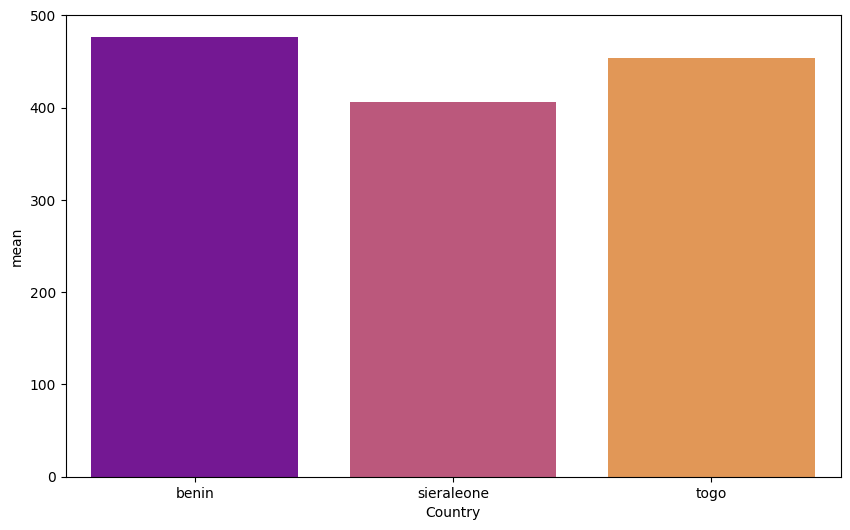

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='mean', data=agg_data['GHI'], hue='Country', palette='plasma', legend=False)
plt.show()